# Movies and TV Shows in Netflix


## Goal

The goal of this project is to conduct a detailed data analysis focused on Netflix's content library, specifically identifying and highlighting the most prevalent categories and genres among movies and TV shows available on the platform. Through this analysis, I aim to provide valuable insights that can be utilized by Netflix and other industry stakeholders.This analysis will enable data-driven decision-making regarding content production and recommendations.

## Setup

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering data

In [3]:
df = pd.read_csv('tmp/netflix1.csv')

In [4]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Assessing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


Data type error in column "date_added"

Checking for missing value

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Chedking for duplicated data

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include="all")

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


There are 8787 unique titles out of 8790 titles

In [9]:
df['title'].value_counts()

9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: title, Length: 8787, dtype: int64

In [10]:
df[df['title']=='22-Jul']

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3285,s4523,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"
4260,s5966,Movie,22-Jul,Paul Greengrass,Norway,10/10/2018,2018,R,144 min,"Dramas, Thrillers"


### Cleaning Data

Changing the data type of "date_added" column

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'])

Dropping duplicates

In [12]:
df = df.drop_duplicates(subset=['type', 'title'], keep='first')

In [13]:
df['title'].value_counts()

Dick Johnson Is Dead                 1
SGT. Will Gardner                    1
Septiembre, un llanto en silencio    1
Set Up                               1
Sex and the City 2                   1
                                    ..
Mercy Black                          1
The Trap                             1
Pinky Memsaab                        1
Love O2O                             1
YOM                                  1
Name: title, Length: 8787, dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8787 non-null   object        
 1   type          8787 non-null   object        
 2   title         8787 non-null   object        
 3   director      8787 non-null   object        
 4   country       8787 non-null   object        
 5   date_added    8787 non-null   datetime64[ns]
 6   release_year  8787 non-null   int64         
 7   rating        8787 non-null   object        
 8   duration      8787 non-null   object        
 9   listed_in     8787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.1+ KB


In [15]:
df.describe(include='all')

<ipython-input-15-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8787,8787,8787,8787,8787,8787,8787.000000,8787,8787,8787
unique,8787,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,Dick Johnson Is Dead,Not Given,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6124,1,2587,3240,110,NaN,3205,1790,362
first,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.181746,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.826635,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN


There are 8787 movies and tv shows from 86 countries that have been added from 2008 to 2021 in Netflix. There are 4528 directors but 2587 movies and tv shows have unknown directors.

- What is the distribution of content types in Netflix?
- Which countries have the most movies and tv shows in Netflix?
- What rating of movie and tv show had the most number?
- How does movie and tv show grow in Netflix over time?
- What genre of movie and tv show had the most number?

## Visualization and Explanatory Analysis

**What is the distribution of content types in Netflix?**

In [16]:
df_type = df['type'].value_counts()
df_type

Movie      6124
TV Show    2663
Name: type, dtype: int64

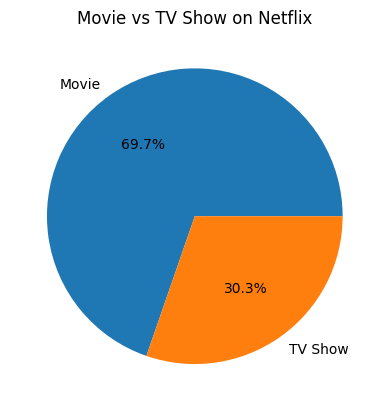

In [17]:
plt.pie(df_type,labels = df_type.index, autopct='%1.1f%%')
plt.title('Movie vs TV Show on Netflix')
plt.show()

**Conclusion**: There are 6124 (69.7%) movies and 2663 (30.3%) tv shows in Netflix.

**Which countries have the most movies and tv shows?**

In [18]:
df_without_notgiven_country = df[df['country']!='Not Given']
df_country_grouped = df_without_notgiven_country.groupby(['type'])['country'].value_counts()
df_country_grouped.sort_values(ascending=False)
# df.country[df['type']=='TV Show'].value_counts().sort_values(ascending=False) # to see which countries have the most tv show

type     country       
Movie    United States     2395
         India              975
TV Show  United States      845
Movie    United Kingdom     387
TV Show  Pakistan           349
                           ... 
Movie    Guatemala            1
         Greece               1
         Croatia              1
         Cameroon             1
TV Show  Uruguay              1
Name: country, Length: 136, dtype: int64

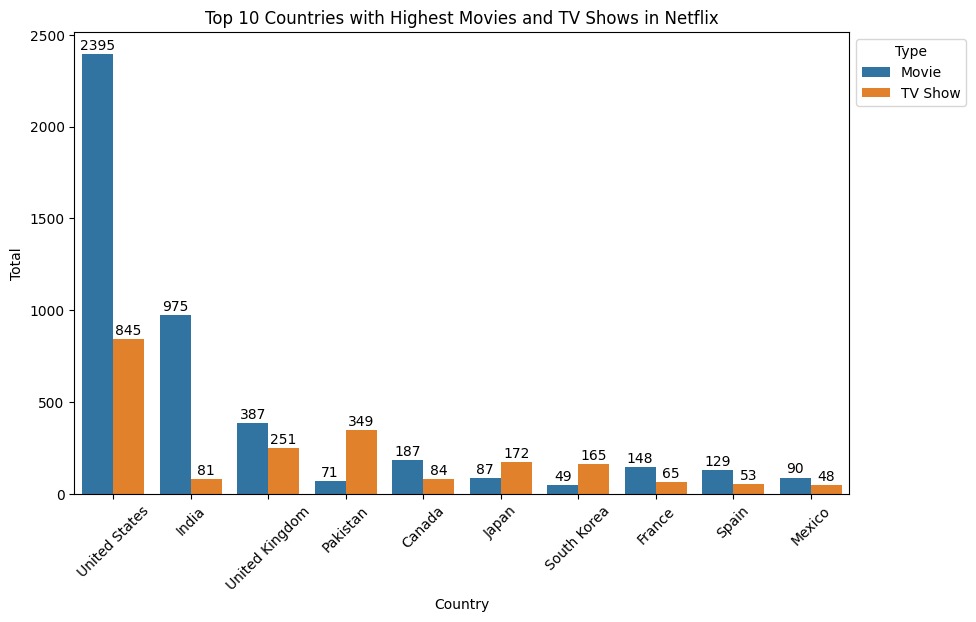

In [19]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='country', data=df_without_notgiven_country, order=df_without_notgiven_country['country'].value_counts().head(10).index, hue='type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel('Total')
plt.xlabel("Country")
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1)
plt.title("Top 10 Countries with Highest Movies and TV Shows in Netflix")
plt.legend(bbox_to_anchor=(1, 1), title='Type', loc='upper left')
plt.show()

**Conclusion**: USA has the most movies and tv shows in Netflix with 2395 movies and 845 tv shows, followed by India and United Kingdom in top 3 for most movies. While Pakistan and United Kingdom followed USA in top 3 for most TV shows.

**What rating of movie and tv show had the most number?**

In [20]:
df_rating = df.groupby(['type'])['rating'].value_counts()
df_rating

type     rating  
Movie    TV-MA       2062
         TV-14       1426
         R            796
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
TV Show  TV-MA       1143
         TV-14        729
         TV-PG        321
         TV-Y7        194
         TV-Y         175
         TV-G          94
         NR             4
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

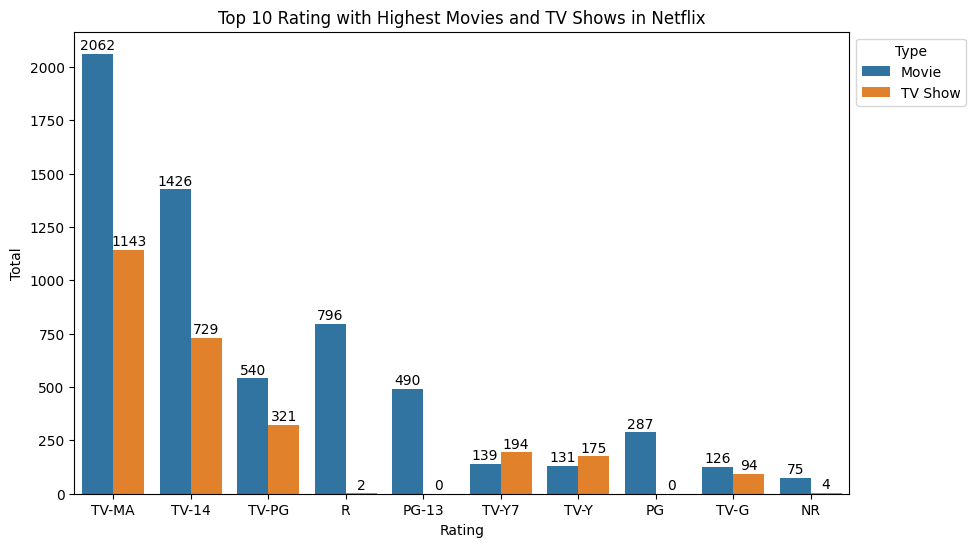

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='rating', data=df, order=df['rating'].value_counts().head(10).index, hue='type')
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.ylabel('Total')
plt.xlabel("Rating")
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1)
plt.title("Top 10 Rating with Highest Movies and TV Shows in Netflix")
plt.legend(bbox_to_anchor=(1, 1), title='Type', loc='upper left')
plt.show()

**Conclusion**: Most of movies and tv shows in Netflix is for mature audience (TV-MA), for ages 14 and above (TV-14), need parental guidance (TV-PG), and restricted for ages under 17 (R).

**How does movie and tv show grow in Netflix over time?**

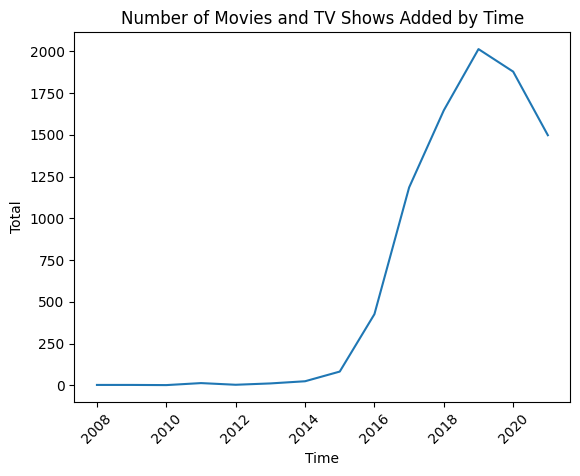

In [22]:
df['Year'] = df['date_added'].dt.year
df_year = df['Year'].value_counts().sort_index()

plt.plot(df_year.index, df_year.values, linestyle = '-')

plt.title('Number of Movies and TV Shows Added by Time')
plt.xlabel('Time')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.show()

**Conclusion**: From 2008 to 2019 the number of movies and tv shows added to Netflix increased while in 2020 and 2021 the number of movies and tv shows added has decreased compared to the previous year.

**What genre of movie and tv show had the most number?**

In [23]:
df['listed_in'].value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64

Most of them have multiple genres

In [24]:
df1 = df.join(df.pop('listed_in').str.get_dummies(', '))
df1

,show_id,type,title,director,country,date_added,release_year,rating,duration,Year,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,2021,...,0,0,0,0,0,0,0,0,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,2021,...,1,0,0,0,0,0,0,0,0,0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,2021,...,0,0,1,1,1,0,0,0,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,2021,...,0,0,0,0,0,0,0,0,0,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,2021,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,2017,...,0,0,1,0,0,0,0,0,0,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,2018,...,0,0,0,0,0,0,0,0,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,2016,...,0,0,1,0,0,0,0,0,0,0
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,2018,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8787 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   show_id                       8787 non-null   object        
 1   type                          8787 non-null   object        
 2   title                         8787 non-null   object        
 3   director                      8787 non-null   object        
 4   country                       8787 non-null   object        
 5   date_added                    8787 non-null   datetime64[ns]
 6   release_year                  8787 non-null   int64         
 7   rating                        8787 non-null   object        
 8   duration                      8787 non-null   object        
 9   Year                          8787 non-null   int64         
 10  Action & Adventure            8787 non-null   int64         
 11  Anime Features                

In [26]:
df_genre = df1.iloc[:,10:]
df_genre = df_genre.sum()
df_genre = df_genre.sort_values(ascending=False).head(10)
df_genre

International Movies        2752
Dramas                      2424
Comedies                    1673
International TV Shows      1348
Documentaries                869
Action & Adventure           859
TV Dramas                    761
Independent Movies           755
Children & Family Movies     641
Romantic Movies              616
dtype: int64

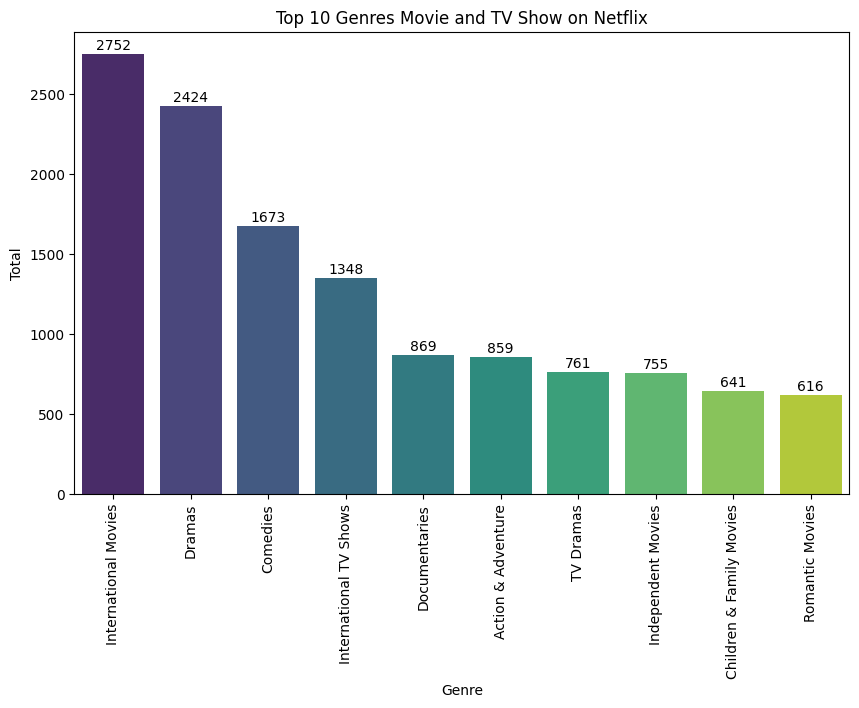

In [27]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_genre.index, y=df_genre.values, palette="viridis")
plt.title("Top 10 Genres Movie and TV Show on Netflix")
plt.xlabel('Genre')
plt.ylabel('Total')
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge', padding=1)
plt.xticks(rotation=90)
plt.show()

**Conclusion**: The International Movies, Dramas, Comedies, and International TV Shows genre had the most numbers of movie and tv show in Netflix.

## Conclusion:

From year to year, movies and tv shows that have been added in Netflix increased but in the last two years the numbers is decreased compared to the previous year with most of the content in Netflix is movie. USA, India, and United Kingdom are the largest contributors of movies and tv shows in Netflix and International Movie is the most favorite produced content. Most of movies and tv shows in Netflix may not suitable for children.